In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_NoSTC_2D import RPLB_acc_NoSTC_2D
from RPLB_acc_NoSTCApril import RPLB_acc_NoSTCApril
from RPLB_acc_NoSTCApril_2D import RPLB_acc_NoSTCApril_2D
from RPLB_acc_LC_2D import RPLB_acc_LC_2D
from RPLB_acc_LCApril_2D import RPLB_acc_LCApril_2D

In [2]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0
# print(tau_0)

NA = 0.1
half_angle = np.arcsin(NA)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
# print('{0:.3g}'.format(1e6*w_0))

P = 100e12  # FL power
t_0 = -10*tau_0

t, z, beta, KE = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, 0.0, 0.0, t_0, 0.0, 0.0)
t_2D, z, r, v_z, v_r, KE_2D = RPLB_acc_NoSTC_2D(lambda_0, tau_0, w_0, P, 0.0, 0.0, t_0, 0.0, 0.0, 0.0)
t_April, z, beta, KE_April = RPLB_acc_NoSTCApril(lambda_0, s, a, P, 0.0, t_0, 0.0, 0.0)
t_April2D, z, r, v_z, v_r, KE_April2D = RPLB_acc_NoSTCApril_2D(lambda_0, s, a, P, 0.0, t_0, 0.0, 0.0, 0.0)
t_LC2D, z, r, v_z, v_r, KE_LC2D = RPLB_acc_LC_2D(lambda_0, tau_0, w_0, P, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
t_AprilLC2D, z, r, v_z, v_r, KE_AprilLC2D = RPLB_acc_LCApril_2D(lambda_0, s, a, P, 0.0, 0.0, 0.0, t_0, 0.0, 0.0, 0.0, 0.0)

92228625.1216784
92047591.69331394
91748376.03924045
92177857.19063503
92023908.65213723
91577762.92943096


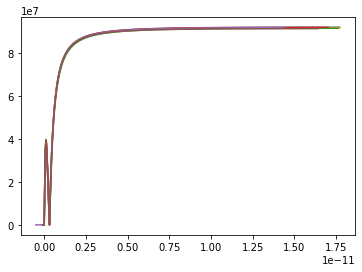

In [3]:
print(KE[-1])
print(KE_2D[-1])
print(KE_April[-1])
print(KE_April2D[-1])
print(KE_LC2D[-1])
print(KE_AprilLC2D[-1])

plt.plot(t, KE)
plt.plot(t_2D, KE_2D)
plt.plot(t_April, KE_April)
plt.plot(t_April2D, KE_April2D)
plt.plot(t_LC2D, KE_LC2D)
plt.plot(t_AprilLC2D, KE_AprilLC2D)